<a href="https://colab.research.google.com/github/ak2ak/tensorflow_practise/blob/master/Supervise_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Supervised Learning with Tensorflow 2.0**

Supervise Learning usually comprises two phases: **training** and **testing/prediction**.

Total data during training phase is called **training set**.

Training Set comprises of **input data(features)** as well as **output data(labels)**.

Aim of Training phase is to learn as much as possible from the input data and form a mapping between input and output, such as it can used to make predictions.

Test set comprises only the input data(features) and not the labels.

Aim of the test phase is to assess how well the model is able to learn and generalize.


If the predicted value are to be numeral then it is called regression.

If the predicted values are to be classes or categorical variables, then it is called classification.

**Linear Regression with Tensorflow 2.0**


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import seaborn as sb
import tensorflow as tf
from tensorflow import keras as ks

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from tensorflow.estimator import LinearRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
boston_load = datasets.load_boston()

In [5]:
feature_columns = boston_load.feature_names
target_columns = boston_load.target
boston_data = pd.DataFrame(boston_load.data, columns=feature_columns).astype(np.float32)

In [6]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.199997,4.0900,1.0,296.0,15.300000,396.899994,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900002,4.9671,2.0,242.0,17.799999,396.899994,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.099998,4.9671,2.0,242.0,17.799999,392.829987,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.799999,6.0622,3.0,222.0,18.700001,394.630005,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200001,6.0622,3.0,222.0,18.700001,396.899994,5.33


In [7]:
boston_data['MEDV']= target_columns.astype(np.float32)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.199997,4.0900,1.0,296.0,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900002,4.9671,2.0,242.0,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.099998,4.9671,2.0,242.0,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.799999,6.0622,3.0,222.0,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200001,6.0622,3.0,222.0,18.700001,396.899994,5.33,36.200001


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to c

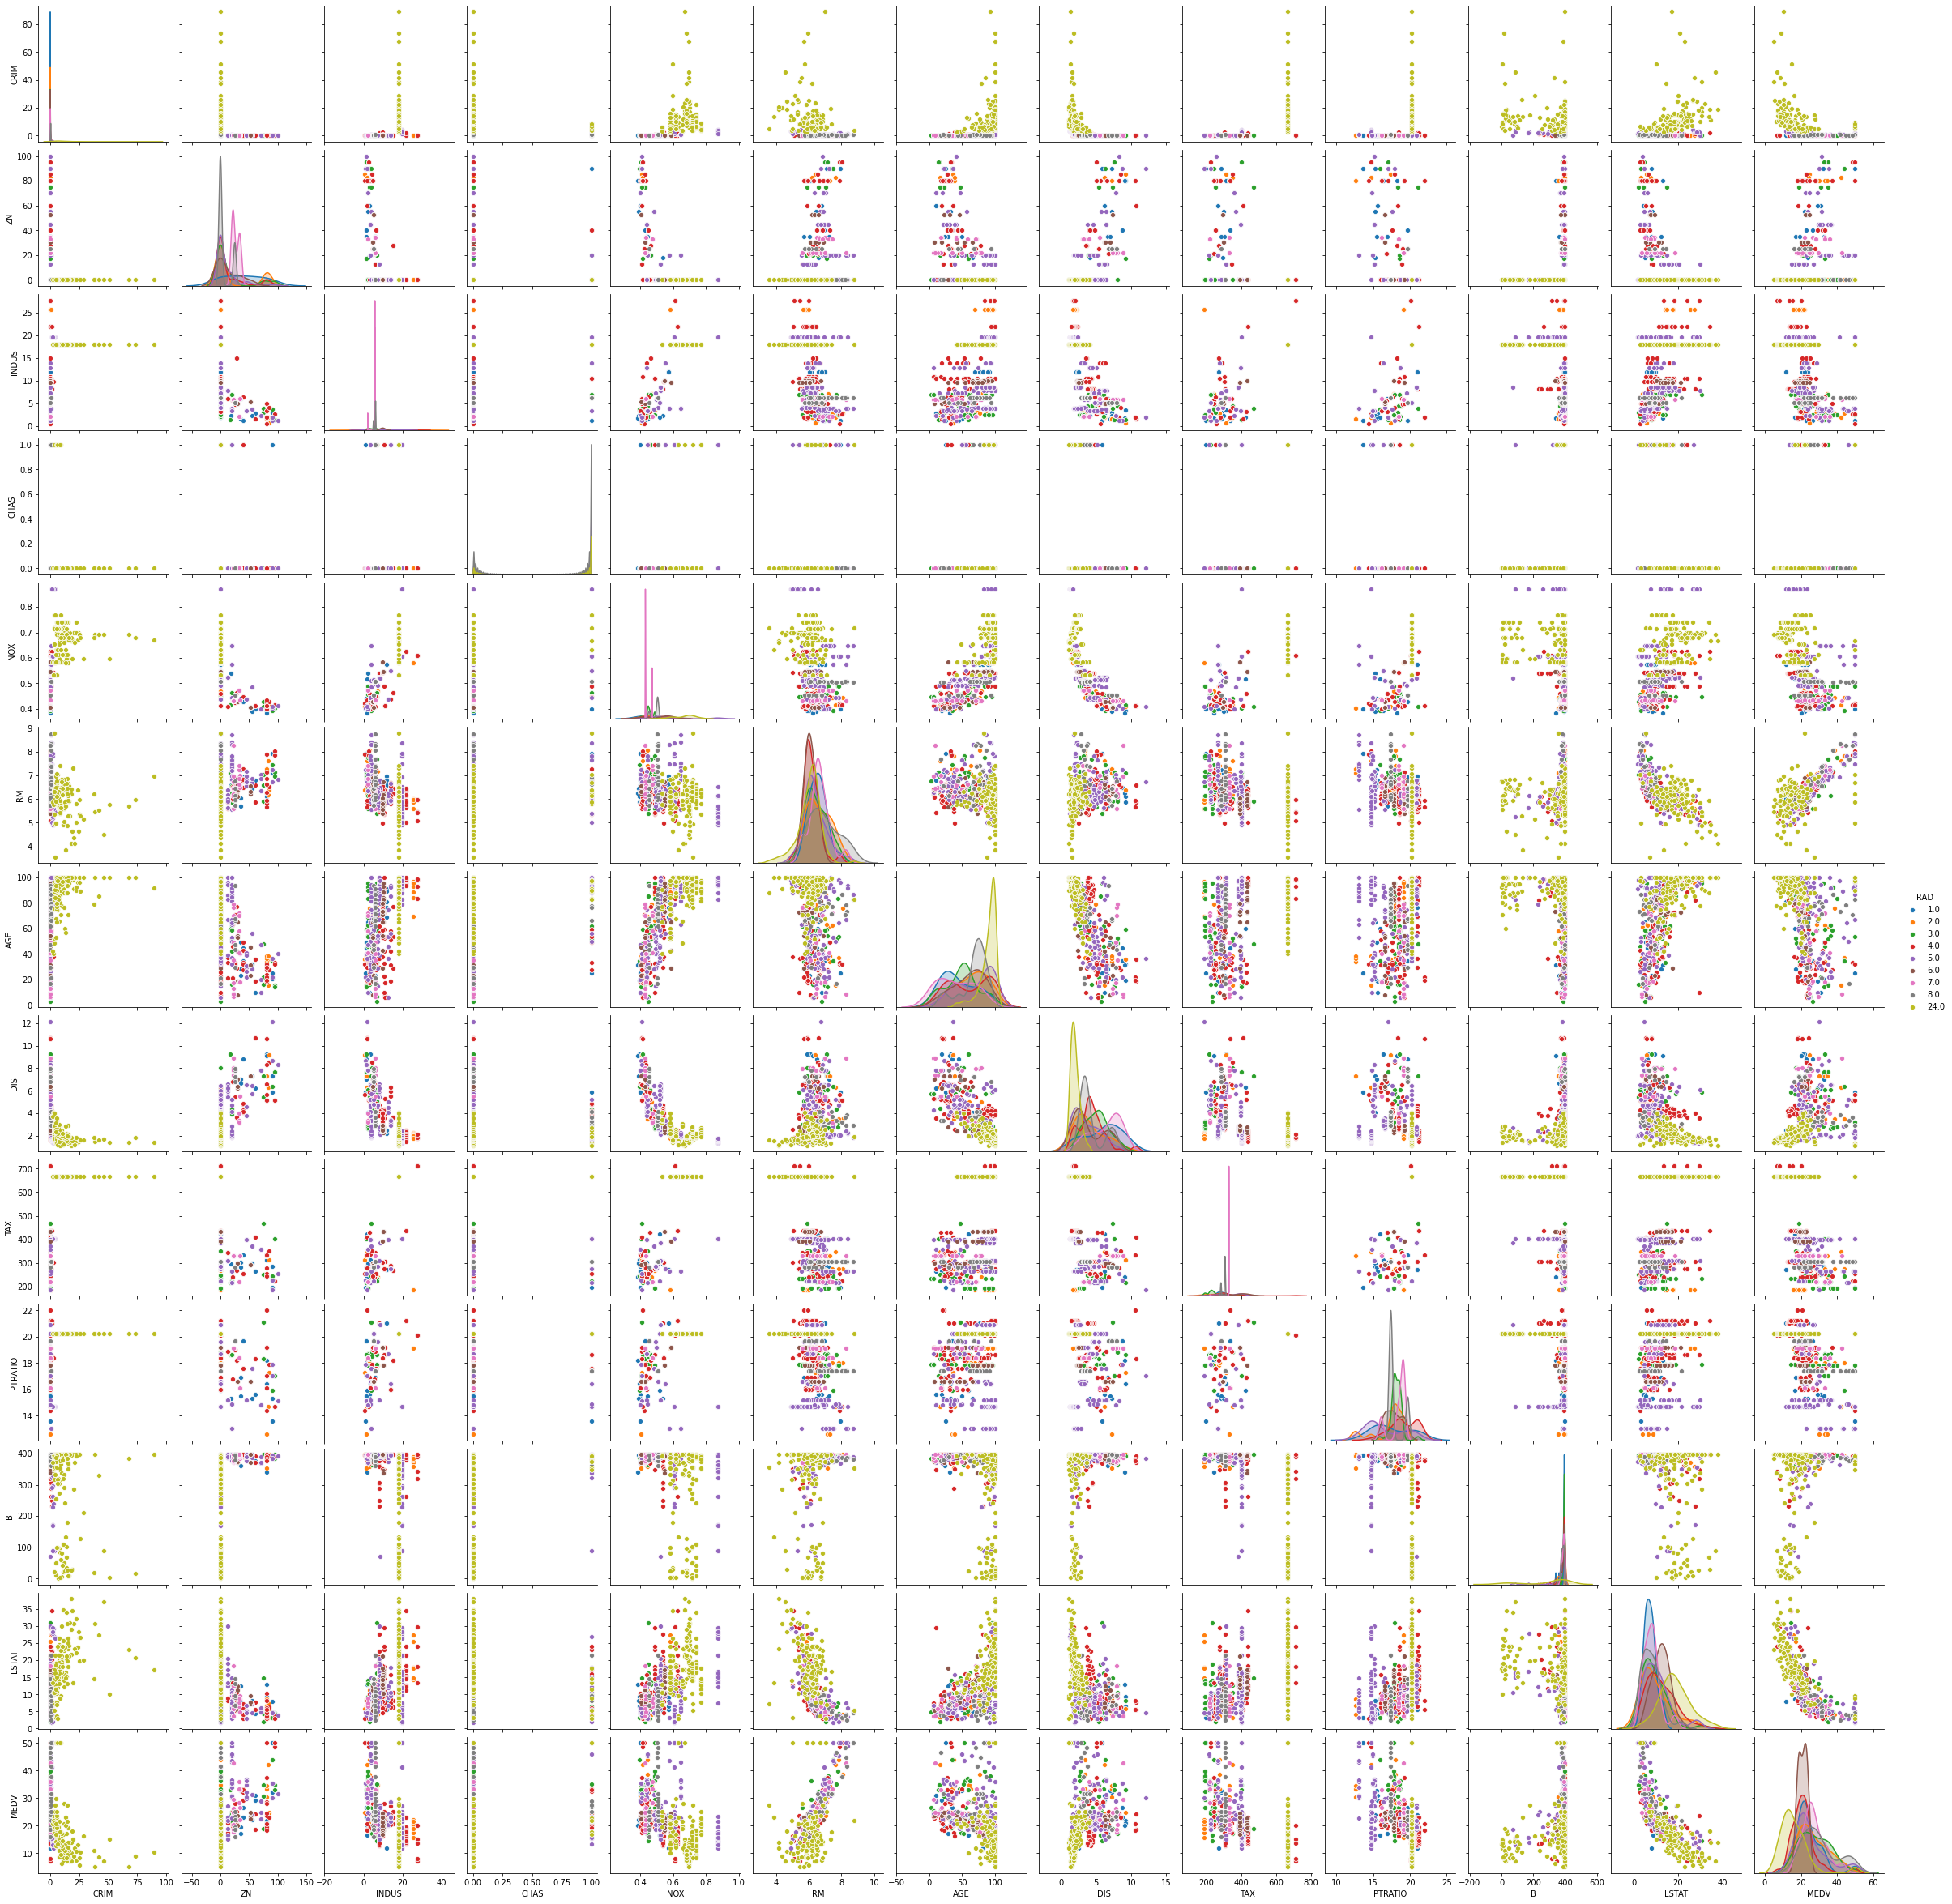

In [12]:
#Relation between the variables, using pairplot and a correlation graph
sb.pairplot(boston_data, hue='RAD')

In [15]:
#Descriptive statistics central tendency and dispersion
orrelation_data = boston_data.corr()
correlation_data.style.background_gradient(cmap='coolwarm', axis=None)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355502,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [16]:
stats = boston_data.describe()
boston_stats = stats.transpose()
boston_stats

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613523,8.601545,0.00632,0.082045,0.256510,3.677083,88.976196
ZN,506.0,11.363636,23.322390,0.00000,0.000000,0.000000,12.500000,100.000000
INDUS,506.0,11.136797,6.860355,0.46000,5.190000,9.690000,18.100000,27.740000
CHAS,506.0,0.069170,0.253993,0.00000,0.000000,0.000000,0.000000,1.000000
NOX,506.0,0.554696,0.115878,0.38500,0.449000,0.538000,0.624000,0.871000
RM,506.0,6.284636,0.702617,3.56100,5.885500,6.208500,6.623500,8.780000
AGE,506.0,68.574921,28.148869,2.90000,45.025000,77.500000,94.074999,100.000000
DIS,506.0,3.795043,2.105711,1.12960,2.100175,3.207450,5.188425,12.126500
RAD,506.0,9.549407,8.707269,1.00000,4.000000,5.000000,24.000000,24.000000
TAX,506.0,408.237152,168.537170,187.00000,279.000000,330.000000,666.000000,711.000000


In [17]:
X_data = boston_data[[i for i in boston_data.columns if i not in ['MEDV']]]
Y_data = boston_data[['MEDV']]

In [18]:
training_features , test_features , training_labels, test_labels = train_test_split(X_data,Y_data, test_size=0.2)

In [19]:
#No of Rows and No of Columns in Training Features
print(training_features.shape[0],training_features.shape[1])

404 13


In [25]:
#No of Rows and No of Columns in Test labels
test_features.shape[0],test_features.shape[1]

(102, 13)

In [27]:
training_labels.shape[1]

1

In [28]:
#Normalize the data

def norm(x):
    stats = x.describe()
    stats = stats.transpose()
    return (x -stats['mean'])/stats['std']

In [30]:
normed_train_features = norm(training_features)
normed_test_features = norm(test_features)

In [32]:
#Build the input pipeline for the tensorflow model

def feed_input(features_dataframe, target_dataframe, num_of_epochs=10,shuffle=True\
               , batch_size =32):
    def input_feed_function():
        dataset = tf.data.Dataset.from_tensor_slices((dict(features_dataframe),\
                                                      target_dataframe))
        if shuffle:
            dataset = dataset.shuffle(2000)
        dataset = dataset.batch(batch_size).repeat(num_of_epochs)
        return dataset
    return input_feed_function

In [43]:
train_feed_input = feed_input(normed_train_features,training_labels)
train_feed_input_testing = feed_input(normed_train_features,training_labels, num_of_epochs=1, shuffle=False)
test_feed_input_testing = feed_input(normed_test_features,training_labels, num_of_epochs=1, shuffle=False)
test_feed_input = feed_input(normed_test_features,test_labels, num_of_epochs=1, shuffle=False)


In [44]:
#MODEL TRAINING

feature_columns_numeric = [tf.feature_column.numeric_column(m)\
                           for m in training_features.columns]
linear_model = LinearRegressor(feature_columns=feature_columns_numeric\
                               , optimizer = 'RMSProp')
linear_model.train(train_feed_input)                          

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp717cth8v', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.


In [45]:
train_predictions = linear_model.predict(train_feed_input_testing)

test_predictions = linear_model.predict(test_feed_input)

train_predictions_series = pd.Series([p['predictions'][0] for p in train_predictions])
test_predictions_series = pd.Series([p['predictions'][0] for p in test_predictions])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp717cth8v/model.ckpt-130
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp717cth8v/model.ckpt-130
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [47]:
#PREDICTION

train_predictions_df = pd.DataFrame(train_predictions_series, columns=['predictions'])

test_predictions_df = pd.DataFrame(test_predictions_series, columns=['predictions'])

training_labels.reset_index(drop=True, inplace=True)

train_predictions_df.reset_index(drop=True, inplace=True)

test_labels.reset_index(drop=True, inplace=True)

test_predictions_df.reset_index(drop=True, inplace=True)

train_labels_with_predictions_df = pd.concat([training_labels, train_predictions_df], axis=1)
test_labels_with_predictions_df = pd.concat([test_labels, test_predictions_df], axis=1)


In [63]:
#Validation
def calculate_errors_and_r2(y_true, y_pred):
    mean_squared_err = (mean_squared_error(y_true, y_pred))
    root_mean_squared_err =  sqrt(mean_squared_err)
    r2 = round(r2_score(y_true, y_pred)*100,0)
    return mean_squared_err, root_mean_squared_err, r2

In [64]:
test_mean_squared_error, test_root_mean_squared_error, test_r2_score_predictions = calculate_errors_and_r2(test_labels, test_predictions_series)
train_mean_squared_error, train_root_mean_squared_error, train_r2_score_percentage = calculate_errors_and_r2(training_labels, train_predictions_series)

In [69]:
train_mean_squared_error,train_root_mean_squared_error,train_r2_score_percentage

(22.640486778109263, 4.758202053098341, 74.0)

In [70]:
test_mean_squared_error, test_root_mean_squared_error,test_r2_score_predictions

(22.376381607560056, 4.730368020308785, 71.0)